In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#ML models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
#Model Selection Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
#Model evaluation Libraries
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error
#Warning filter library
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier


In [2]:
h_d=pd.read_csv("heart.csv")

In [3]:
h_d

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [4]:
h_d.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [5]:
h_d.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

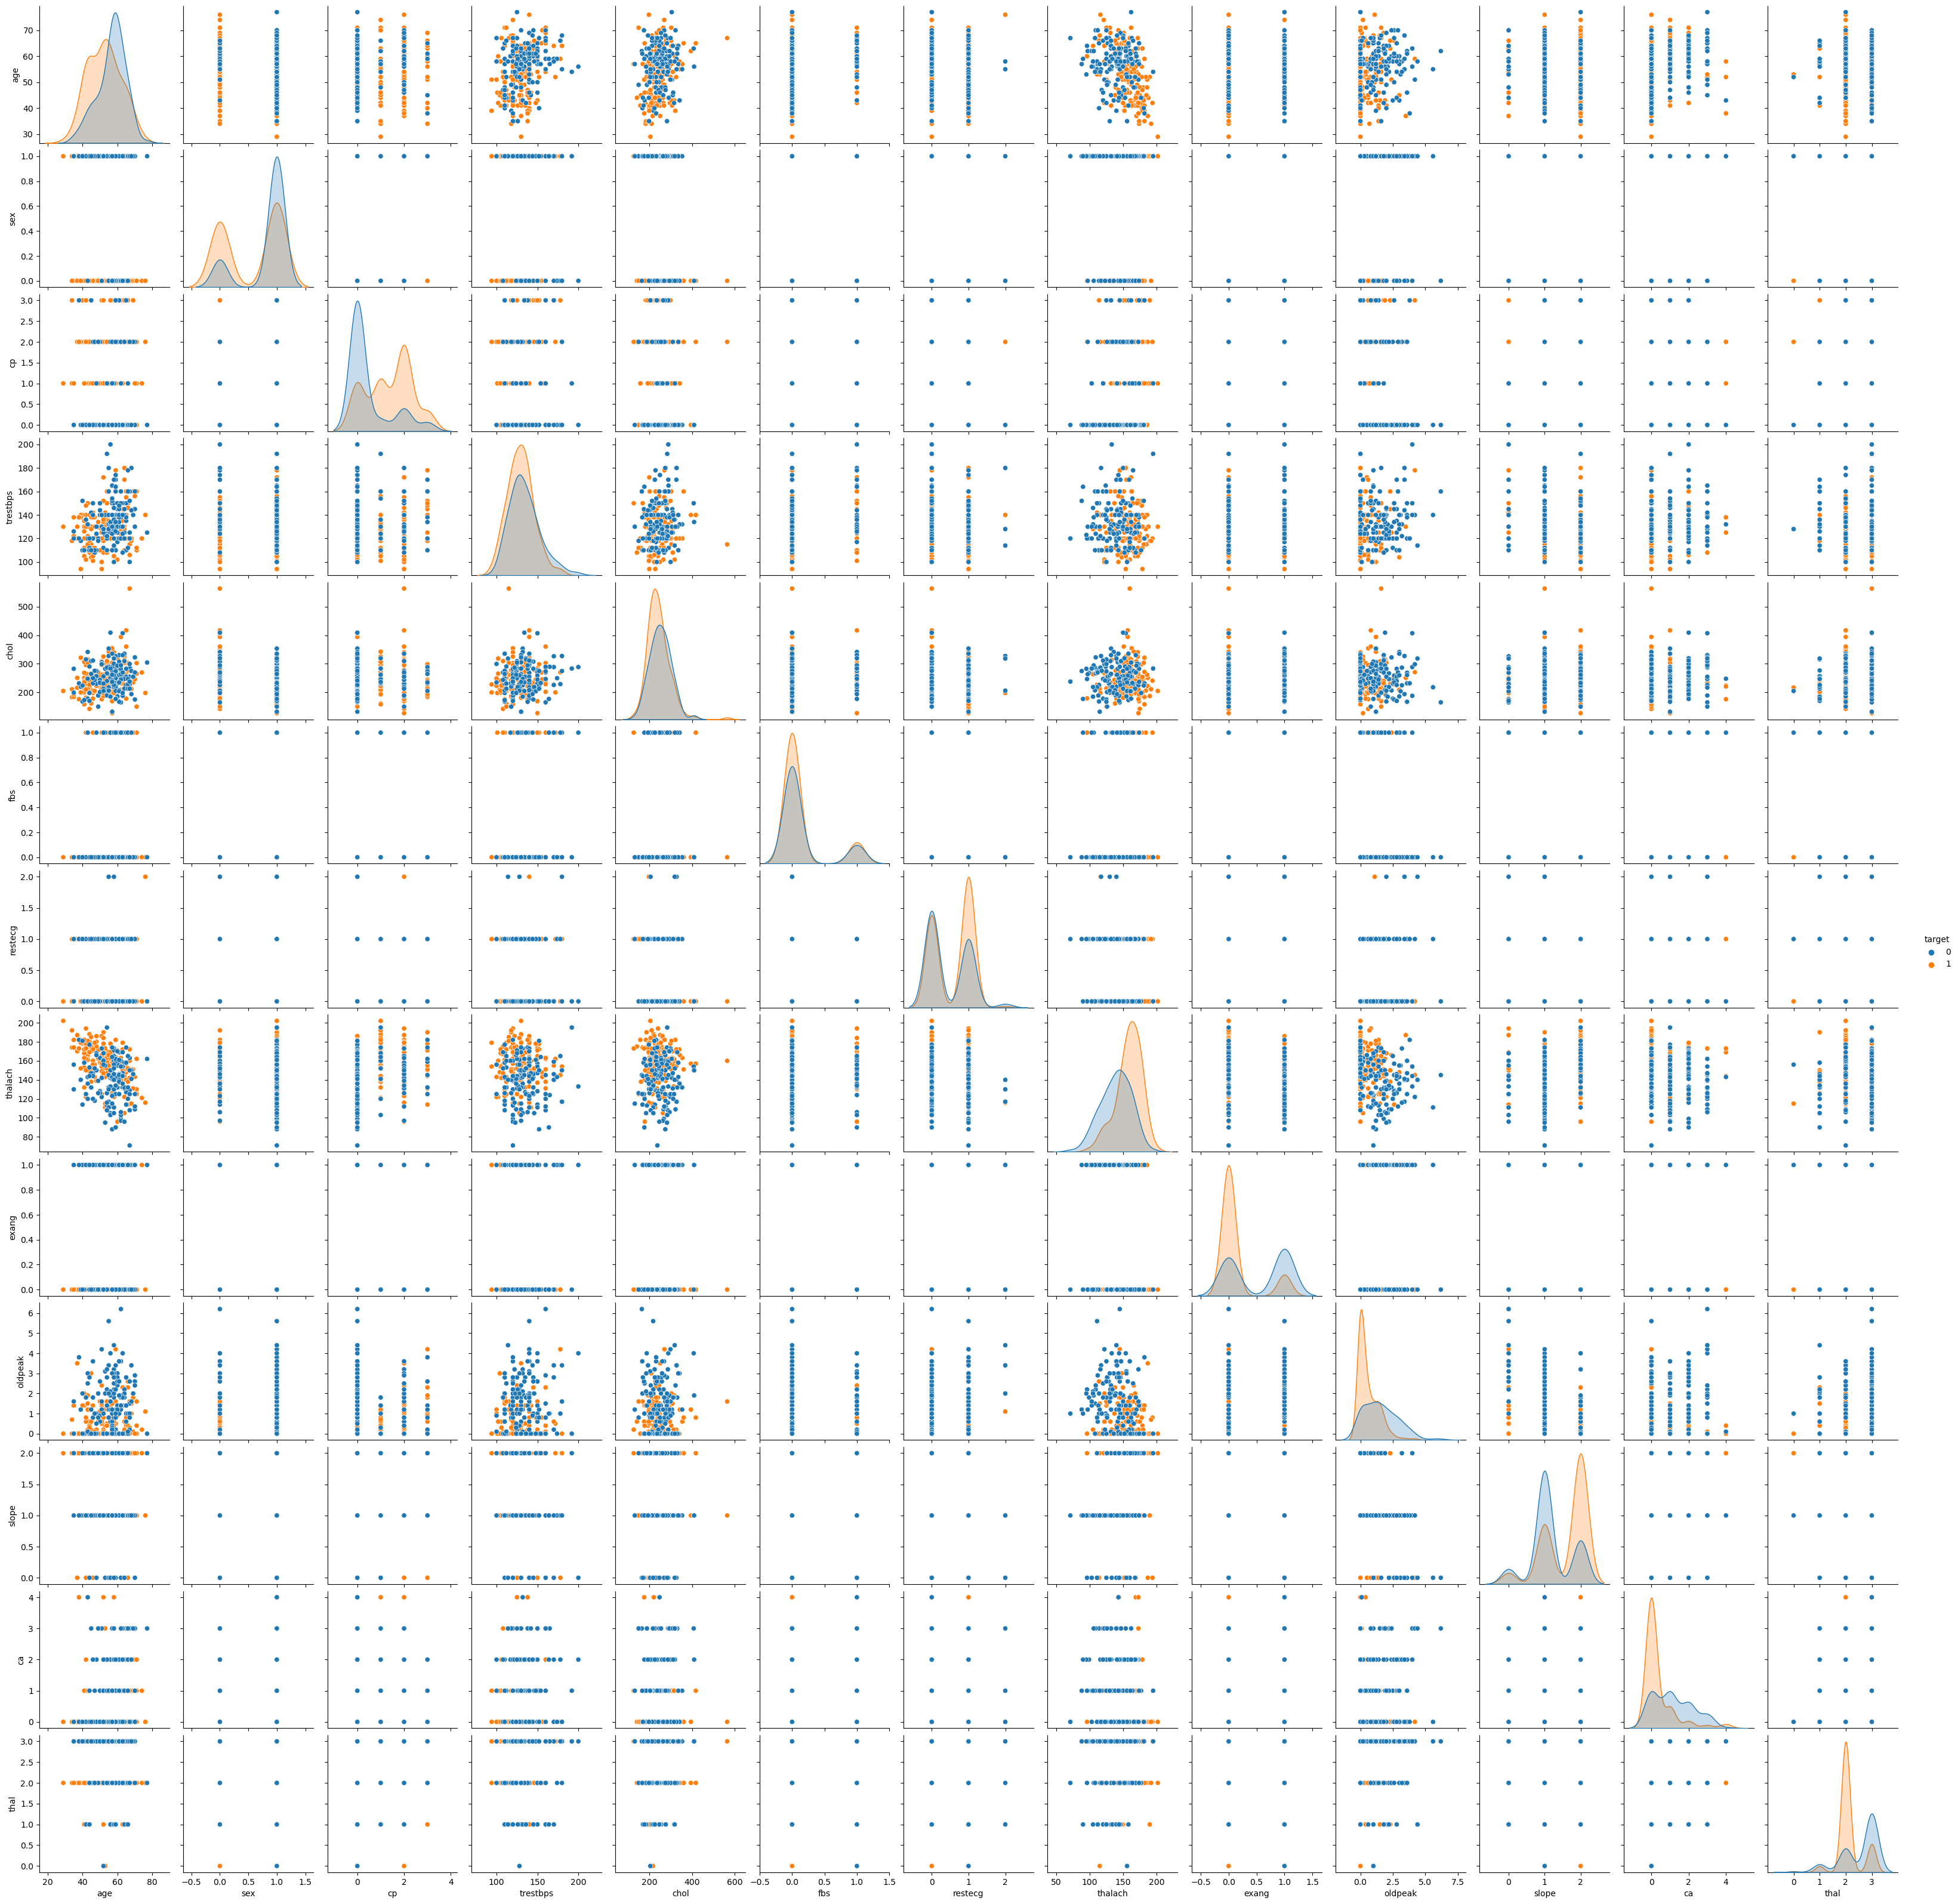

In [6]:
sns.pairplot(h_d,hue="target",diag_kind="kde")

# Correaltion Map

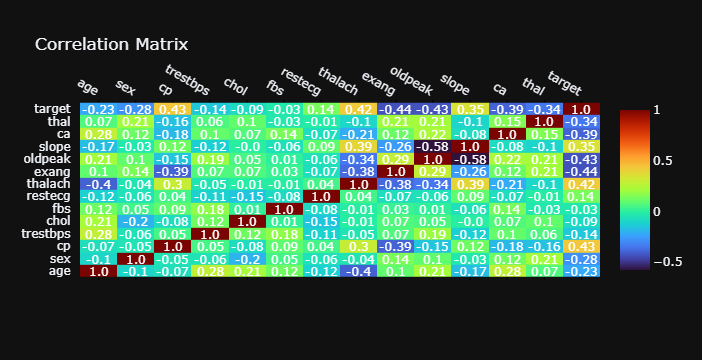

In [8]:
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px


# Calculate the correlation matrix
corr = h_d.corr()

# Create an annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True,
    colorscale=px.colors.sequential.Turbo
)


fig.update_layout(title='Correlation Matrix', template='plotly_dark')

# Show the plot
fig.show()


### a few features have negative correlation with the target value while some have positive. Next, I'll take a look at the histograms for each variable

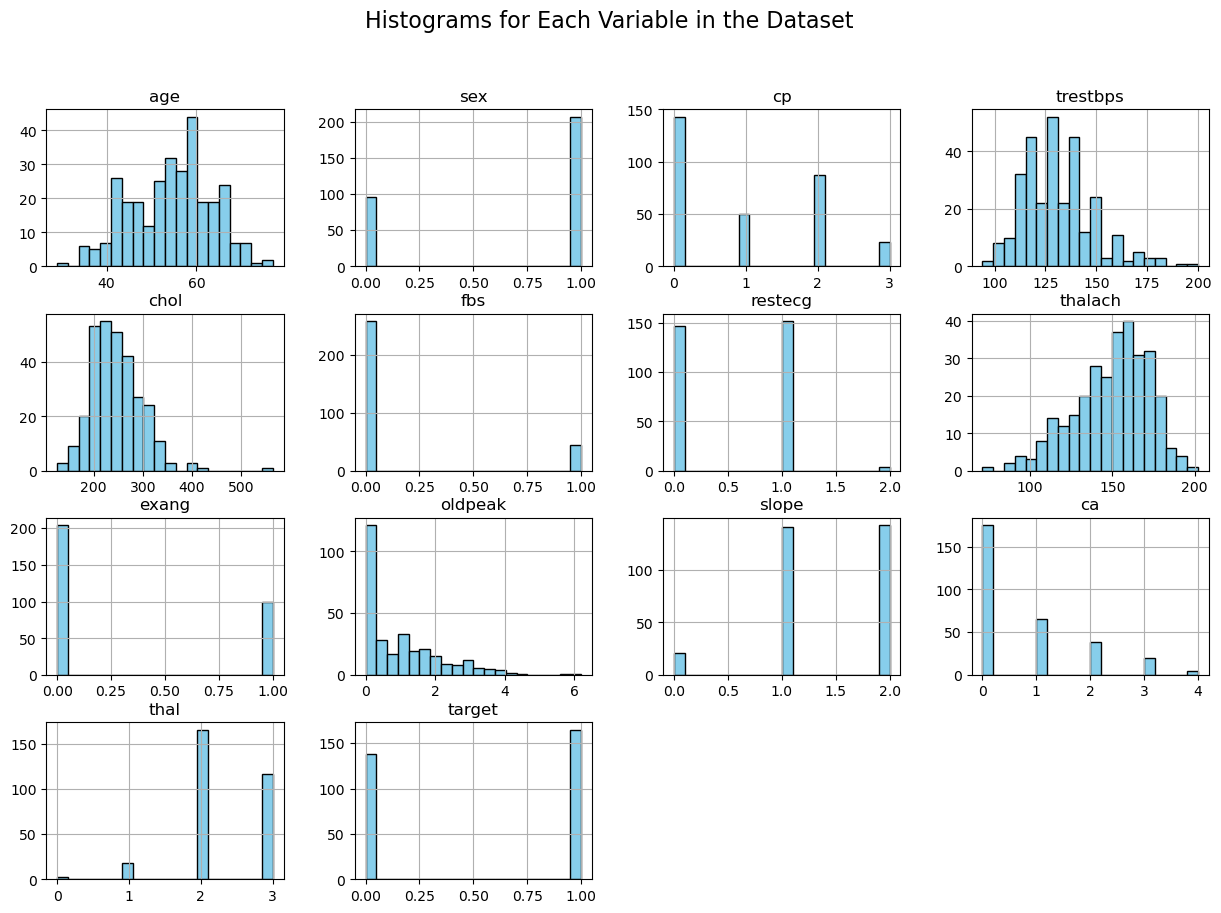

In [10]:
h_d.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Each Variable in the Dataset', fontsize=16)
plt.show()

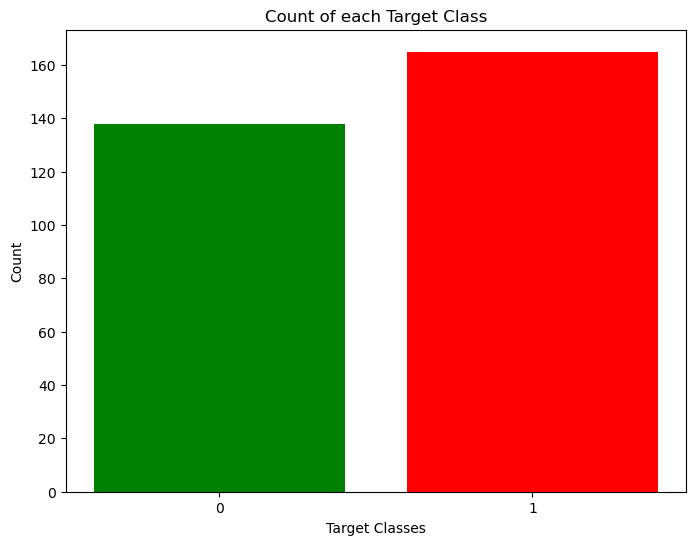

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.bar(h_d['target'].unique(), h_d['target'].value_counts(), color=['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
plt.show()


In [12]:
h_d = pd.get_dummies(h_d, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [33]:
print(h_d.head())

        age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1  False   True   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1  False   True   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1   True  False   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1  False   True   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1   True  False   

    cp_0   cp_1  ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  \
0  False  False  ...    False  True  False  False  False  False   False   
1  False  False  ...    False  True  False  False  False  False   False   
2  False   True  ...     True  True  False  False  False  False   False   
3  False   True  ...     True  True  False  False  False  False   False   
4   True  False  ...     True  True  False  False  False  False   False   

   thal_1  thal_2  thal_3  
0    True   False   False  
1   False    True   False  
2 

In [35]:
print(h_d.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [13]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
h_d[columns_to_scale] = standardScaler.fit_transform(h_d[columns_to_scale])

### TRAIN,TEST,SPLIT

In [15]:
y = h_d['target']
X = h_d.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## Model Training and Evaluation

In [17]:
# Define parameter grids for each model
param_grids = {
    'K Neighbors Classifier': {'n_neighbors': np.arange(1, 31)},
    'Support Vector Classifier': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    'Decision Tree Classifier': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest Classifier': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
}

# Initialize models
models = {
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Perform GridSearchCV for each model
best_params = {}
best_scores = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best score for {model_name}: {grid_search.best_score_:.2f}')
    print('-----------------------------------')

# Train and evaluate each model with the best parameters
accuracy_scores = {}

for model_name, model in models.items():
    model.set_params(**best_params[model_name])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f'{model_name} Accuracy with best parameters: {accuracy:.2f}')
    print(confusion_matrix(y_test, y_pred))
    

Best parameters for K Neighbors Classifier: {'n_neighbors': 24}
Best score for K Neighbors Classifier: 0.86
-----------------------------------
Best parameters for Support Vector Classifier: {'C': 10, 'kernel': 'linear'}
Best score for Support Vector Classifier: 0.87
-----------------------------------
Best parameters for Decision Tree Classifier: {'max_depth': 30, 'min_samples_split': 2}
Best score for Decision Tree Classifier: 0.77
-----------------------------------
Best parameters for Random Forest Classifier: {'max_depth': 30, 'n_estimators': 100}
Best score for Random Forest Classifier: 0.86
-----------------------------------
K Neighbors Classifier Accuracy with best parameters: 0.81
[[36 12]
 [ 7 45]]
Support Vector Classifier Accuracy with best parameters: 0.84
[[40  8]
 [ 8 44]]
Decision Tree Classifier Accuracy with best parameters: 0.71
[[35 13]
 [16 36]]
Random Forest Classifier Accuracy with best parameters: 0.82
[[38 10]
 [ 8 44]]


In [18]:

results = [
    {'Model': 'K Neighbors Classifier', 'Best Parameters': {'n_neighbors': 24}, 'Best Score': 0.86, 'Accuracy': 0.81},
    {'Model': 'Support Vector Classifier', 'Best Parameters': {'C': 10, 'kernel': 'linear'}, 'Best Score': 0.87, 'Accuracy': 0.84},
    {'Model': 'Decision Tree Classifier', 'Best Parameters': {'max_depth': 10, 'min_samples_split': 10}, 'Best Score': 0.76, 'Accuracy': 0.74},
    {'Model': 'Random Forest Classifier', 'Best Parameters': {'max_depth': None, 'n_estimators': 200}, 'Best Score': 0.86, 'Accuracy': 0.83}
]

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


                       Model                             Best Parameters  \
0     K Neighbors Classifier                         {'n_neighbors': 24}   
1  Support Vector Classifier               {'C': 10, 'kernel': 'linear'}   
2   Decision Tree Classifier  {'max_depth': 10, 'min_samples_split': 10}   
3   Random Forest Classifier    {'max_depth': None, 'n_estimators': 200}   

   Best Score  Accuracy  
0        0.86      0.81  
1        0.87      0.84  
2        0.76      0.74  
3        0.86      0.83  


In [19]:
# Find the best model based on the highest accuracy score
best_model_df = results_df[results_df['Accuracy'] == results_df['Accuracy'].max()]

# Display the best model
print(best_model_df)


                       Model                Best Parameters  Best Score  \
1  Support Vector Classifier  {'C': 10, 'kernel': 'linear'}        0.87   

   Accuracy  
1      0.84  


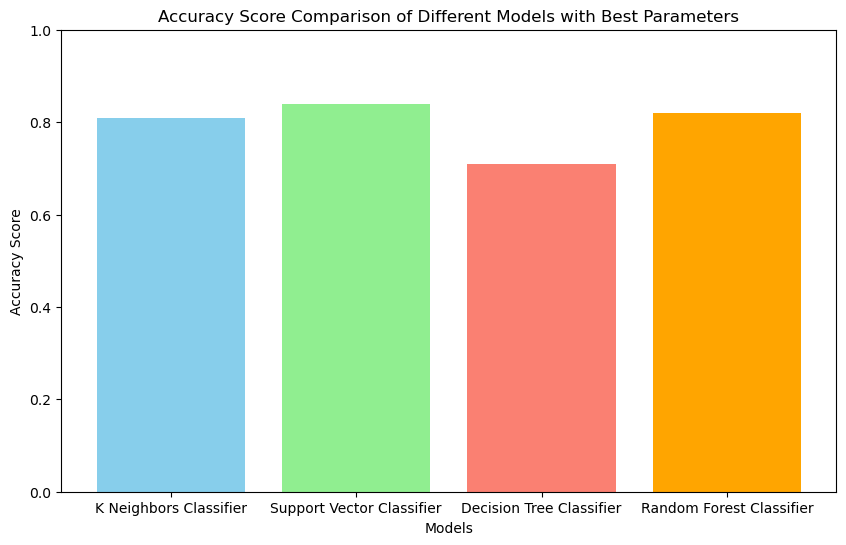

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison of Different Models with Best Parameters')
plt.ylim(0, 1)
plt.show()


In [21]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import joblib
from sklearn.svm import SVC

# Initialize and train the Support Vector Classifier with the best parameters
best_svc = SVC(C=10, kernel='linear')
best_svc.fit(X_train, y_train)

# Save the trained model to a file
joblib_file = "best_svc_model.pkl"
joblib.dump(best_svc, joblib_file)

print(f"Support Vector Classifier model saved as {joblib_file}")


Support Vector Classifier model saved as best_svc_model.pkl
